# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import re
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Import Datasets

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kumpulan Data Set Bootcamp DS 11A/seattle-weather.csv")
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


# About Datasets

Terdapat 6 kolom pada data yaitu : {`date`, `precipitation`, `temp_max`, `temp_min`,	`wind`,	`weather`}

*   **`date`**: Tanggal 
*   **`precipitation`**: Produk dari kondensasi uap air di atmosfer
*   **`temp_max`**: Suhu tertinggi
*   **`temp_min`**: Suhu terendah
*   **`wind`**: Kecepatan angin
*   **`weather`**: Cuaca yang dihasilkan (drizzle, rain, sun, snow, fog)


# Analysing Dataset

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.shape

(1461, 6)

**Observasi:**
1.   Data berisi 6 kolom dengan 1461 baris 
2.   Terdapat dua tipe kolom (Numerical & Categorical) pada data.
3.  Terdapat 4 kolom yang numerical, dan isi/variabel dari pada kolom tsb adalah kontinu 
4.   Terdapat 1 kolom berbentuk tanggal.
5.   Terdapat 1 kolom yang isinya berbentuk categorical pada kolom `weather`



# Exploratory Data Analysis

## General Information & Missing Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


**Observasi:**
1. Data berisi 6 kolom dengan 1461 baris 
2. Tidak terlihatnya missing value pada data (akan dicek lebih lanjut)

In [ ]:
# number of missing values per column
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## Duplicated data check

In [ ]:
# number of duplicated data
data.duplicated().sum()

0

**Observasi:**
1. Telah dibuktikan bahwa tidak terdapat missing value 
2. Tidak terdapat duplicate pada data diatas

## Statistical summary

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['weather']

numericals = ['precipitation', 'temp_max', 'temp_min', 'wind']

In [ ]:
# numerical statistical sumary
data[numericals].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**Observasi:**

1.   Dibagian min dan max masih make sense karena tidak ada nilai yang aneh dikeduanya (misal tertukar)
2.   Mean ~ 50% (Median) `temp_max, temp_min, wind nilai` tidak berbeda jauh

3.   Mean > 50% (Median) pada kolom `precipitation`, menunjukkan keduanya memiliki distribusi yang sedikit condong positif


In [ ]:
# describe method on categorical data
data[categoricals].describe()

,weather
count,1461
unique,5
top,rain
freq,641


**Observasi:**

1.   Terdapat 5 uniqe value pada kolom weather yang berisikan 5 cuaca
2.   Cuaca yang paling sering terjadi adalah hujan (rain)
3.   Tercatat 641 kali terjadi cuaca hujan dari 1461 data


# Data Visualization

## Boxplot to detect outliers

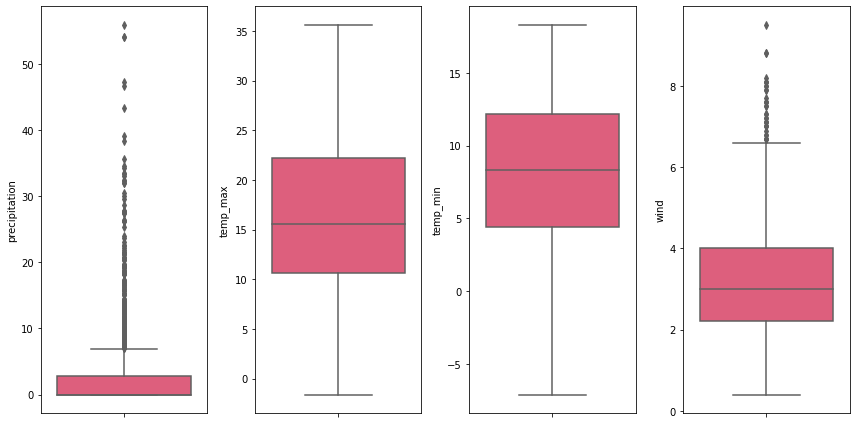

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='#F24A72')
    plt.tight_layout()

**Observasi:**

1.   Terdapat outliers pada kolom `precipitation` yang nilainya lebih dari 10
2.   Terdapat outliers pada kolom `wind` yang nilainya lebih dari 7


## Histrogram to detect skewness

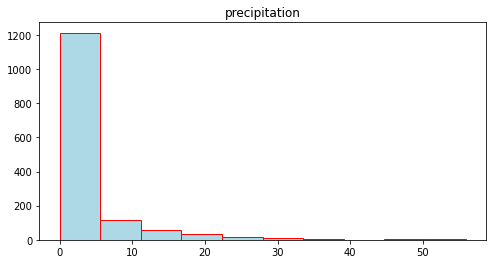

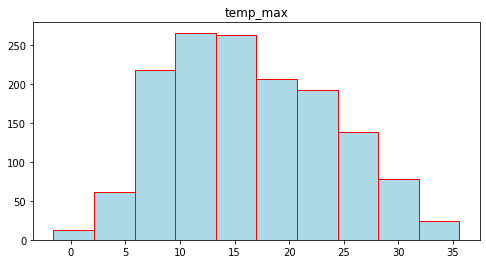

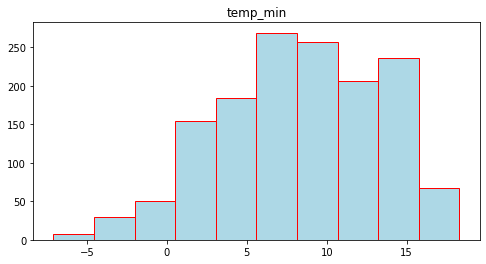

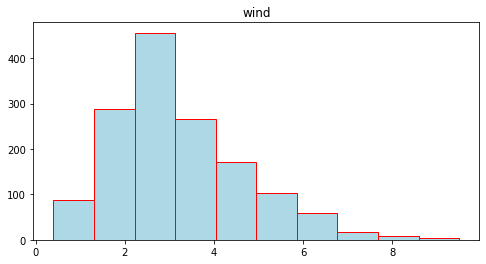

In [ ]:
num=['precipitation', 'temp_max', 'temp_min', 'wind']
for col in num:
  plt.figure(figsize=(8,4))
  plt.hist(data [col], color = "lightblue", ec="red")
  plt.title(col)
  plt.show()

**Observasi:**

Dilihat dari data histogram diatas, terdapat skewness pada beberapa data

precipitation	temp_max	temp_min	wind

1.   Kolom `precipitation`, `temp_max`,	`wind` diidentifikasi terdapat poistive skew
2.   Kolom `temp_min` diidentifikasi terdapat negative skew

## Boxplot to detect skewness

Mendeteksi skewness antara numerical kolom dengan categorical kolom

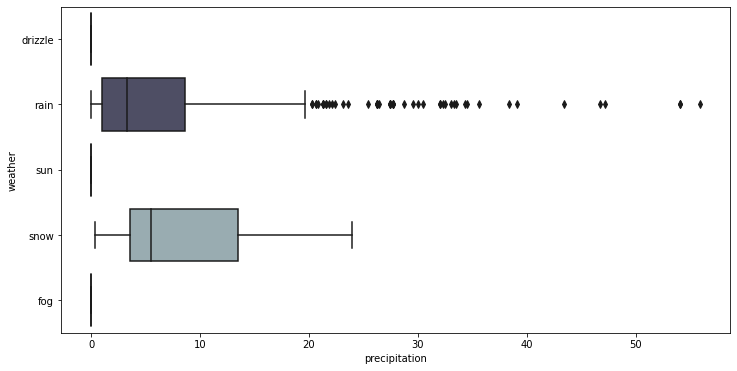

In [ ]:
# Boxplot antara precipitation dengan weather
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="bone")

**Observasi:**

Dari Boxplot antara `weather` dan `precipitation` di atas, nilai rain memiliki banyak outlier positive dan juga rain dan snow keduanya memiliki skewness positive.

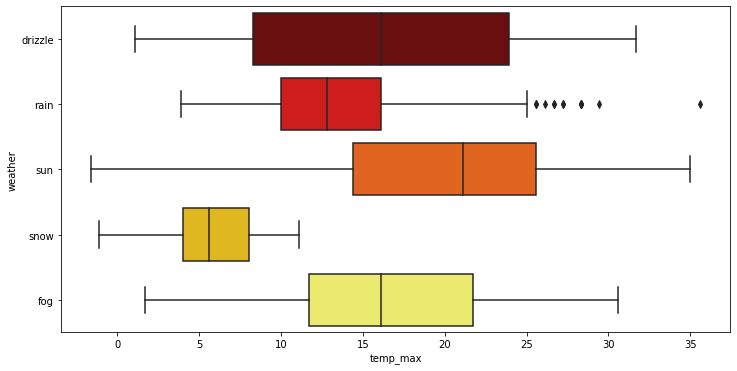

In [ ]:
# Boxplot antara temp_max dengan weather
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=data,palette="hot")

**Observasi:**

Dari Boxplot antara `weather` dan `temp_max` di atas, nilai rain memiliki outlier positive dan juga beberapa cuaca memiliki skewness positive & negative.

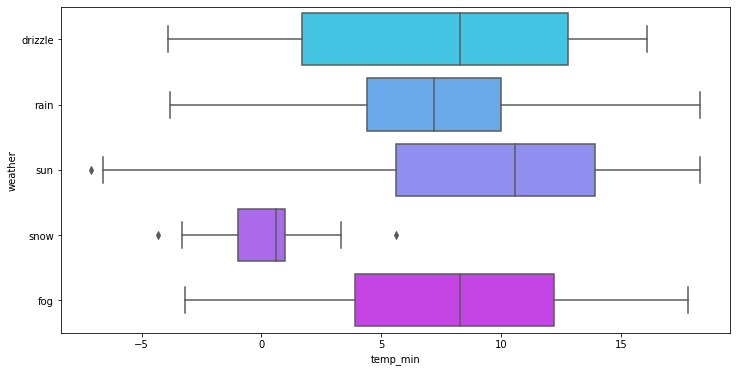

In [ ]:
# Boxplot antara temp_min dengan weather
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=data,palette="cool")

**Observasi:**

Dari Boxplot antara `weather` dan `temp_min` di atas, data cenderung memiliki nagative skew dan beberapa ada yang mempunyai oulier portive dan negative

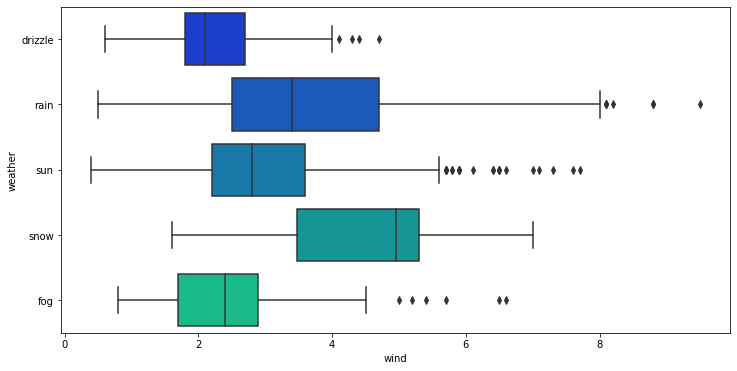

In [ ]:
# Boxplot antara wind dengan weather
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="winter")

**Observasi:**

Dari Boxplot antara `weather` dan `wind` di atas, data cenderung memiliki positive skew dan banyak yang mempunyai oulier positive 

## Heatmap to detect Correlation

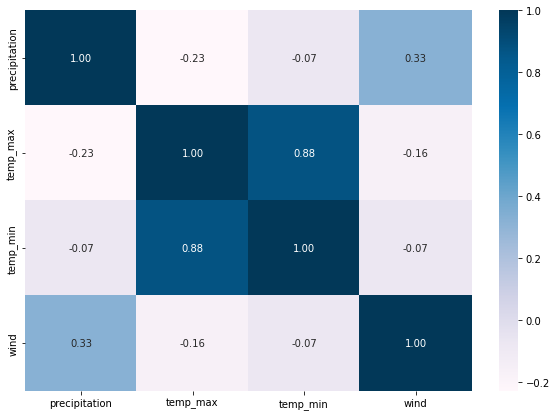

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap="PuBu")

**Observasi:**

Terlihat korelasi positif antara `temp_max` dan `temp_min`


# Data Preprocessing

## Drop Unnecessary Variables

In [ ]:
df=data.drop(["date"],axis=1)

**Observasi:**

Dalam kumpulan data ini Tanggal (date) adalah variabel yang tidak diperlukan karena tidak mempengaruhi pengolahan data sehingga kolom date akan dibuang.


## Remove Outliers & Infinite Values

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

**Observasi:**

Karena data terdapat ouliers, maka dari itu data outlier tersebut akan dihapus supaya data terstruktur dan lebih merata

## Handling Skewed Data

In [ ]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

**Observasi:**

Karena terdapat outlier yang cenderung paling banyak diantara kolom lainnya, kita akan rubah nilainya dengan sqrt (nilai kuadrat) 

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


## Scaling the weather variables using label Encoder

In [ ]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

**Observasi:**

Data  scaling  memiliki  peran  penting  dalam  praproses  data  yang  berdampak  pada  kinerja  dari  algoritme  machine  learning. Agar lebih memaksimalkan penganalisaan data, maka weather akan dirubah menjadi encode

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


## Splitting The Dataset Into Depandant and Independant Variables

In [ ]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [ ]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# Algorithms & Model Training

Algoritma & Machine Learning yang akan dipakai:

1.  K-Nearest Neighbour(KNN)

2.   Support Vector Machine(SVM)

3.   Gradient Boost

4.   Extreme Gradient Boosting(XGBC)

5.   Naive Bayes Classifier(GNB)

In [ ]:
# K-Nearest Neighbour(KNN)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:75.00%


**Observasi:**

Dengan K-Nearest Neighbour(KNN) didapat persentasi akurasi 75%

In [ ]:
# Support Vector Machine(SVM)
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.42%


**Observasi:**

Dengan Support Vector Machine(SVM) didapat persentasi akurasi 77.42%. Terdapat Kenaikan persentase dari model sebelumnya

In [ ]:
# Gradient Boost
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:85.48%


**Observasi:**

Dengan Gradient Boost didapat persentasi akurasi 85.48%. Terdapat Kenaikan persentase dari model sebelumnya

In [ ]:
# Extreme Gradient Boosting(XGBC)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:83.06%


**Observasi:**

Dengan Extreme Gradient Boosting(XGBC) didapat persentasi akurasi 83.06% tidak jauh berbeda dengan Gradient Boost . Terdapat Kenaikan persentase dari model sebelumnya. 

In [ ]:
# Naive Bayes Classifier(GNB)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("GNB Accuracy:{:.2f}%".format(gnb.score(x_test,y_test)*100))

GNB Accuracy:81.45%


**Observasi:**

Dengan Naive Bayes Classifier(GNB) didapat persentasi akurasi 81.45%. Terdapat Kenaikan persentase dari model sebelumnya

# Checking With Function

In [ ]:
df.head(20)

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2
7,0.000000,10.0,2.8,1.414214,4
8,2.073644,9.4,5.0,1.843909,2
9,1.000000,6.1,0.6,1.843909,2
10,0.000000,6.1,-1.1,2.258318,4
11,0.000000,6.1,-1.7,1.378405,4


Akan dibuat uji coba untuk test model manakah yang lebih akurat dalam menebak

Akan di ambil sample pada baris ke 15 :
*   `precipitation`	= 1.581139	
*   `temp_max` = 1.7
*   `temp_min` = -2.8
*   `wind`     = 2.236068
*   `weather` = 3 (Snow)

Akan dilihat manakah model yang bisa menebak cuaca pada baris ke 15 adalah Snow

## Checking K-Nearest Neighbour(KNN)

In [ ]:
input=[[1.581139,1.7,-2.8,5.0]]
ot=knn.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Sun


**Observasi:**

K-Nearest Neighbour(KNN) dengan keakuratan 75% masih **Salah** menebak cuaca yang seharusnya Snow. Maka dari itu model ini kurang baik untuk dipilih

## Checking Support Vector Machine(SVM)

In [ ]:
input=[[1.581139,1.7,-2.8,5.0]]
ot=svm.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Sun


**Observasi:**

Support Vector Machine(SVM) dengan keakuratan 77.42% masih **Salah** menebak cuaca yang seharusnya Snow. Maka dari itu model ini kurang baik untuk dipilih

 ## Checking Gradient Boost

In [ ]:
input=[[1.581139,1.7,-2.8,5.0]]
ot=gbc.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Snow


**Observasi:**

Gradient Boost dengan keakuratan 85.48% sudah **Benar** menebak cuaca yang seharusnya Snow. Maka dari itu model ini baik untuk dipilih

## Checking Extreme Gradient Boosting(XGBC)

In [ ]:
input=[[1.581139,1.7,-2.8,5.0]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Snow


**Observasi:**

Checking Extreme Gradient Boosting(XGBC) dengan keakuratan 83.06% sudah **Benar** menebak cuaca yang seharusnya Snow. Maka dari itu model ini baik untuk dipilih

## Checking Naive Bayes Classifier(GNB)

In [ ]:
input=[[1.581139,1.7,-2.8,5.0]]
ot=gnb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Snow


**Observasi:**

Checking Naive Bayes Classifier(GNB) dengan keakuratan 81.45% sudah **Benar** menebak cuaca yang seharusnya Snow. Maka dari itu model ini baik untuk dipilih

# Recommended Models

Kesimpulan dari test dengan beberapa model, model yang baik atau bisa menebak cuaca dengan benar adalah model yang akurasinya diatas 80% seperti Gradient Boost, Extreme Gradient Boosting(XGBC), Naive Bayes Classifier(GNB).

Dari 3 model tersebut terdapat model yang persentasenya paling besar yaitu Gradient Boost dengan persentase akurasi 85.48%. **Maka dipilihnya Gradient Boost Sebagai model yang paling baik dari 5 model yang dipilih**